# 03 Masked Area

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image and mask
image = cv2.imread(r'C:\Users\ibnes\OneDrive\Desktop\Image.jpg')
mask = cv2.imread(r'C:\Users\ibnes\OneDrive\Desktop\Mask.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
def compute_region_area(mask):
    # Compute the area of the region in the mask
    area = np.sum(mask / 255)  # Assuming the mask is binary (0 and 255)
    return area

In [5]:
def label_region(image, mask):
    # Convert the mask to a binary image
    _, binary_mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the image
    labeled_image = image.copy()
    cv2.drawContours(labeled_image, contours, -1, (0, 255, 0), 2)
    # Add label "Tumor" to the image
    cv2.putText(labeled_image, "Tumor", (contours[0][0][0][0], contours[0][0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    return labeled_image

Area of the region: 899.4352941176471


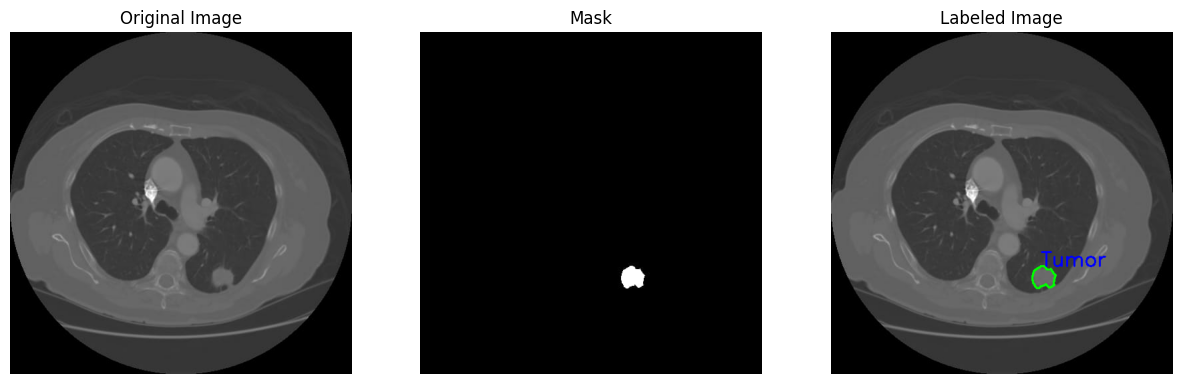

Area of the region: 899.4352941176471


In [6]:
# Compute the area of the region in the mask
region_area = compute_region_area(mask)
print("Area of the region:", region_area)
# Label the region by overlapping the mask over the image
labeled_image = label_region(image, mask)
# Display the labeled image
# Plot the images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title('Labeled Image')
plt.axis('off')

plt.show()

# Print the computed area
print("Area of the region:", region_area)